# ML final project

In [ ]:
# Download ART
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 890kB 4.3MB/s 
     |████████████████████████████████| 21.0MB 1.6MB/s 
     |████████████████████████████████| 235kB 48.2MB/s 
     |████████████████████████████████| 747kB 42.6MB/s 


## Load Data

(1797, 64) (1797,)


<Figure size 432x288 with 0 Axes>

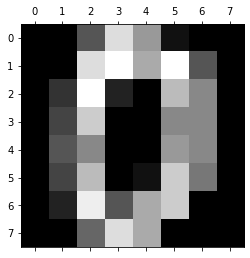

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape, digits.target.shape)
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target)
nb_classes = np.unique(y_train).shape[0]
print(np.unique(y_train))
print(X_train.shape, X_test.shape)

'''
# (Optional) Transform class labels to be one-hot-encoded of shape (nb_samples, nb_classes).
def convertToOnehot(labels, nb_classes):
    onehot = []
    for y in labels:
        vec = np.zeros(nb_classes)
        vec[y] = 1
        onehot.append(vec)
    return np.array(onehot)

y_train = convertToOnehot(y_train, nb_classes)
y_test = convertToOnehot(y_test, nb_classes)
'''
print(y_train.shape, y_test.shape)

[0 1 2 3 4 5 6 7 8 9]
(1437, 64) (360, 64)
(1437,) (360,)


In [ ]:
from sklearn.svm import SVC
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import SklearnClassifier

# Create the model
#model = SVC(C=0.1, kernel="linear")
model = SVC(C=1.0, kernel="rbf").fit(X_train, y_train)

# Create the ART classifier
min_pixel_value = np.amin(X_train)
max_pixel_value = np.amax(X_train)
print(min_pixel_value, max_pixel_value)
classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))

# Train the ART classifier
#classifier.fit(X_train, y_train)

0.0 16.0


In [ ]:
# Evaluate the ART classifier on benign test examples
#predictions = classifier.predict(X_test)
predictions = model.predict(X_test)
print(predictions)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy on benign test examples: {:.2f}%".format(accuracy * 100))

[0 9 7 5 3 1 9 7 5 7 0 3 9 4 2 0 2 4 4 8 0 6 8 5 3 6 5 5 1 7 0 0 3 3 2 9 6
 9 4 1 6 3 0 7 1 9 0 9 4 2 9 2 7 2 1 8 7 4 8 5 2 8 2 0 0 9 5 9 6 1 7 2 5 7
 9 4 6 5 9 0 7 9 5 8 4 4 4 7 3 3 4 1 0 4 5 0 3 5 6 3 2 8 4 8 8 7 4 5 2 4 1
 1 1 8 7 6 9 9 3 1 7 6 5 9 6 4 4 2 9 3 3 8 8 7 2 3 9 7 3 6 7 9 4 9 3 4 2 5
 5 2 6 6 5 9 8 4 6 3 5 3 7 8 9 5 7 2 8 2 7 5 2 8 3 7 7 2 9 1 6 7 7 2 6 0 8
 2 8 1 4 6 1 5 2 6 7 5 7 1 9 5 1 0 1 1 8 6 9 5 2 9 5 5 0 1 4 5 4 5 1 7 6 0
 3 2 6 6 7 8 6 4 8 1 8 2 4 5 0 3 0 1 1 4 1 9 4 1 1 3 9 8 7 3 4 1 5 2 3 0 0
 2 3 9 2 1 6 1 6 0 7 1 0 6 4 2 5 7 9 3 5 3 0 4 7 4 3 2 0 8 7 6 2 9 3 8 1 6
 3 6 4 0 6 6 8 4 0 5 6 1 3 3 8 3 8 8 8 1 0 7 1 5 5 8 9 0 2 2 5 4 0 0 0 4 2
 0 2 6 9 8 1 7 4 0 4 3 8 0 6 7 9 7 5 5 2 9 1 1 8 6 1 6]
Accuracy on benign test examples: 98.33%


## Create adverse test examples

In [ ]:
# Generate adversarial test examples
def fgAttack(X, epsilon):
    attack = FastGradientMethod(estimator=classifier, eps=epsilon)  # TODO: could experiment other attacks
    X_adv = attack.generate(x=X)
    return X_adv
    
X_test_adv = fgAttack(X_test, 3)

In [ ]:
X_test, X_test_adv

(array([[ 0.,  0.,  3., ...,  5.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16., 12.,  0.],
        [ 0.,  7., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 16.,  5.,  0.],
        [ 0.,  0.,  0., ...,  4.,  0.,  0.],
        [ 0.,  0.,  2., ..., 15.,  5.,  0.]]),
 array([[ 0.,  3.,  6., ...,  8.,  3.,  3.],
        [ 0.,  3., 11., ..., 16., 15.,  3.],
        [ 0.,  4.,  9., ...,  3.,  3.,  3.],
        ...,
        [ 0.,  3.,  3., ..., 13.,  2.,  3.],
        [ 0.,  3.,  3., ...,  1.,  0.,  0.],
        [ 0.,  3.,  5., ..., 12.,  2.,  3.]], dtype=float32))

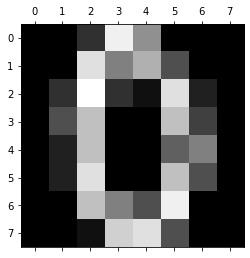

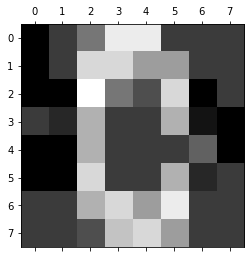

In [ ]:
plt.matshow(X_test[0].reshape(8, 8)) 
plt.matshow(X_test_adv[0].reshape(8, 8)) 
plt.show()

In [ ]:
model = SVC(C=1.0, kernel="rbf").fit(X_train, y_train)

# Evaluate the ART classifier on adversarial test examples
#predictions = classifier.predict(X_test_adv)
predictions = model.predict(X_test_adv)
print(predictions)
#accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy on adversarial test examples: {:.2f}%".format(accuracy * 100))

[0 9 8 5 8 9 9 7 5 8 0 9 9 1 2 0 8 8 8 8 0 8 8 8 2 6 3 8 1 7 0 8 8 3 7 9 5
 9 8 9 6 8 0 3 1 9 0 9 4 3 8 2 7 2 8 8 7 4 8 9 2 9 2 0 0 9 8 3 8 1 3 9 1 9
 9 4 6 5 7 0 7 9 5 9 8 4 4 3 3 8 4 8 0 4 8 0 9 8 6 9 9 8 0 8 8 8 4 8 8 4 2
 3 1 1 7 5 3 4 3 8 7 6 5 9 8 4 4 2 9 8 3 3 8 7 2 3 5 7 3 6 8 5 4 9 8 6 8 8
 8 2 8 6 9 9 8 4 6 5 8 7 9 1 9 8 7 3 8 9 8 5 2 5 8 8 8 7 9 7 6 9 9 2 6 0 8
 8 1 4 4 8 5 9 2 6 7 5 9 8 9 5 8 0 1 8 8 6 8 9 8 9 5 5 0 8 4 5 4 5 8 7 6 0
 8 8 6 8 5 8 8 8 8 1 8 2 8 5 0 9 0 3 1 4 8 9 4 1 1 3 9 8 7 8 8 5 5 8 1 0 0
 8 3 8 8 1 6 1 8 0 7 4 8 6 4 8 5 8 4 5 9 8 0 4 8 4 9 8 0 8 7 8 9 9 8 8 1 1
 3 6 0 0 6 8 7 4 0 8 8 1 8 3 8 3 8 8 8 1 0 7 7 5 5 8 9 8 8 8 1 8 0 0 0 4 2
 0 1 5 9 8 1 7 8 0 0 3 2 0 5 9 9 7 9 8 2 9 2 1 1 8 8 8]
Accuracy on adversarial test examples: 55.56%


In [ ]:
X_train_adv = fgAttack(X_train, 3)

In [ ]:
model = SVC(C=1.0, kernel="rbf").fit(X_train_adv, y_train)
predictions = model.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy on adversarial test examples: {:.2f}%".format(accuracy * 100))

Accuracy on adversarial test examples: 66.11%


# Defences

## Binary Thresholding

## Data Transformation (PCA)

https://arxiv.org/pdf/1704.02654.pdf

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8362326

This is a data preprocessing method that makes models more robust against attack. It does not necessarily works after the test data have been attacked.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [ ]:
model = SVC(C=1.0, kernel="rbf").fit(X_train, y_train)
# classifier = SklearnClassifier(model=model, clip_values=(np.amin(X_train), np.amax(X_train)))
""" Original Testing Set """
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on original test examples: {:.2f}%".format(accuracy * 100))

""" Adversial Testing Set """
attack = FastGradientMethod(estimator=classifier, eps=3)
X_test_adv = attack.generate(x=X_test)
adv_pred = model.predict(X_test_adv)
adv_accuracy = np.sum(adv_pred == y_test) / len(y_test)
print("Accuracy on adversarial test examples: {:.2f}%".format(adv_accuracy * 100))

Accuracy on original test examples: 98.33%
Accuracy on adversarial test examples: 60.00%


In [ ]:
# input: n * d matrix
def PCA_method(input, k=30):
  i = input.T
  eig_val, eig_vec = np.linalg.eig(i @ i.T)
  idx = eig_val.argsort()[::-1]   
  eigenValues = eig_val[idx]
  eigenVectors = eig_vec[:,idx]
  I = np.identity(train_eig_val.shape[0])[:, :k]
  assert ((i @ i.T @ eigenVectors) - (eigenValues * eigenVectors) < 1e-3).all() 
  X_k = eigenVectors @ I @ I.T @ eigenVectors @ i
  return X_k.T

new_X_train = PCA_method(X_train, 64)
new_X_test = PCA_method(X_test, 64)

model = SVC(C=1.0, kernel="rbf").fit(new_X_train, y_train)
# classifier = SklearnClassifier(model=model, clip_values=(np.amin(X_train), np.amax(X_train)))
""" Original Testing Set """
y_pred = model.predict(new_X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on original test examples: {:.2f}%".format(accuracy * 100))

""" Adversial Testing Set """
this_classifier = SklearnClassifier(model=model, clip_values=(np.amin(new_X_train), np.amax(new_X_train)))
attack = FastGradientMethod(estimator=this_classifier, eps=3)
X_test_adv = attack.generate(x=new_X_test)
adv_pred = model.predict(X_test_adv)
adv_accuracy = np.sum(adv_pred == y_test) / len(y_test)
print("Accuracy on adversarial test examples: {:.2f}%".format(adv_accuracy * 100))

NameError: ignored

In [ ]:
pca = PCA(n_components=25)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

model = SVC(C=1.0, kernel="rbf").fit(pca_X_train, y_train)
# classifier = SklearnClassifier(model=model, clip_values=(np.amin(X_train), np.amax(X_train)))
""" Original Testing Set """
y_pred = model.predict(pca_X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy on original-PCA test examples: {:.2f}%".format(accuracy * 100))

""" Adversial Testing Set """
this_classifier = SklearnClassifier(model=model, clip_values=(np.amin(pca_X_train), np.amax(pca_X_train)))
attack = FastGradientMethod(estimator=this_classifier, eps=3)
X_test_adv_2 = attack.generate(x=pca_X_test)
adv_pred = model.predict(X_test_adv_2)
adv_accuracy = np.sum(adv_pred == y_test) / len(y_test)
print("Accuracy on adversarial-PCA test examples: {:.2f}%".format(adv_accuracy * 100))

In [ ]:
# Previous, first PCA then attack; here, attack then PCA
X_test_adv_pca = pca.transform(X_test_adv)
X_test_adv_pca.shape
adv_pred_pca = model.predict(X_test_adv_pca)
adv_accuracy_pca = np.sum(adv_pred_pca == y_test) / len(y_test)
print("Accuracy on adversarial-PCA test examples (PCA after attack): {:.2f}%".format(adv_accuracy_pca * 100))

## Adversarial training / Data augmentation

https://arxiv.org/pdf/1707.06728.pdf section 3.2

### For each original data point x, add:


#### 1. Perturbed example drawn from a Gaussian distribution centered in x, with standard deviation 1

In [ ]:
from sklearn.datasets import make_spd_matrix

def getGaussianTrain(X_train):
    cov = make_spd_matrix(X_train.shape[1]) * 2  # random symmetric positive definite matrix as covariance
    #cov = np.full((X_train.shape[1], X_train.shape[1]), 0.3)
    X_train_gaus = []
    y_train_gaus = []
    for i, x in enumerate(X_train):
        x_gaus = np.random.multivariate_normal(x, cov, 1)[0]
        X_train_gaus.append(x_gaus)
        y_train_gaus.append(y_train[i])

    X_train_gaus = np.array(X_train_gaus)
    y_train_gaus = np.array(y_train_gaus)
    #X_train_gaus = np.concatenate((X_train, X_train_gaus), axis=0)
    #y_train_gaus = np.concatenate((y_train, y_train_gaus))
    X_train_gaus.shape, y_train_gaus.shape
    return X_train_gaus, y_train_gaus

In [ ]:
def trainSVM(X_train, y_train, X_test, y_test):
    model = SVC(C=1.0, kernel="rbf").fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    print("Accuracy on test examples: {}%".format(accuracy * 100))
    return model

In [ ]:
trainSVM(X_train, y_train, X_test_adv, y_test)

Accuracy on test examples: 55.55555555555556%


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
gaussianModel = trainSVM(X_train_gaus, y_train_gaus, X_test_adv, y_test)

Accuracy on test examples: 53.61111111111111%


In [ ]:
# Add Gaussian noise for training data that is perturbed
X_train_gaus, y_train_gaus = getGaussianTrain(X_train_adv)
gaussianModel2 = trainSVM(X_train_gaus, y_train_gaus, X_test, y_test)

Accuracy on test examples: 82.22222222222221%


[ 0.  1. 12. 16. 10.  1.  0.  0.  0.  8. 12.  3. 11.  8.  0.  0.  0. 12.
 13.  6. 12.  8.  0.  0.  0.  3. 15. 16. 16. 16.  1.  0.  0.  0.  0.  0.
  0. 13.  6.  0.  0.  0.  0.  0.  0.  6. 11.  0.  0.  0. 13.  0.  0.  5.
 12.  0.  0.  0. 12. 16. 16. 16.  8.  0.]


<function matplotlib.pyplot.show>

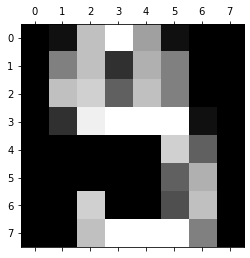

In [ ]:
img = X_train[563]
print(img, y_train[563])
plt.matshow(img.reshape(8, 8)) 
plt.show()

[-0.12745219  2.17430064 12.35953997 18.55964953  7.64994638 -1.65035434
 -2.5344699   1.22681224 -0.46300078 10.83013584 12.94678231  1.22168842
  9.64712317  8.00000598  1.02085851  0.79868222  0.25003519 10.17225825
 14.09769992  1.60098486 11.90046249 11.86231507  0.2232902   3.3118419
  0.78288106  1.77208962 13.35198193 13.38108961 14.66037555 14.9755805
 -0.47048059  0.35210236 -3.6920264   1.78464303 -0.79003671 -0.95636783
  3.74050668 13.64210943  6.53526484  1.31529547 -0.48862962  1.7260304
  0.1560191   0.29667537  2.54275042  7.066667    9.44344515  1.52797329
 -0.02104116  2.94757785 17.37278074 -0.56026471  0.82518852  2.59151522
 13.71862317  1.06624281 -0.54029953 -1.60662759 12.8796948  16.08113361
 13.99092357 16.67145652 10.03546749  2.95487741]


<function matplotlib.pyplot.show>

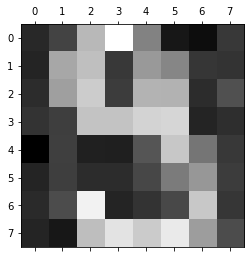

In [ ]:
img = X_train_gaus[200]
print(img, y_train_gaus[2000])
plt.matshow(img.reshape(8, 8))
plt.show()

#### 2. Adversarial example crafted with Jacobian Saliency Method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/My Drive/ml_project/'

In [ ]:
from art.attacks.evasion import SaliencyMapMethod

In [ ]:
idx = np.random.randint(len(X_train), size=100)

In [ ]:
attack_jsma = SaliencyMapMethod(classifier=classifier, theta=0.1)
X_train_jsma = attack_jsma.generate(x=X_train[idx, :])
X_train_jsma.shape

JSMA: 100%|██████████| 100/100 [39:36<00:00, 23.76s/it]


(100, 64)

In [ ]:
with open(dir + 'X_train_jsma.npy', 'wb') as f:
    np.save(f, X_train_jsma)
with open(dir + 'y_train_jsma.npy', 'wb') as f:
    np.save(f, y_train[idx])

In [ ]:
X_train_jsma = np.load(dir + 'X_train_jsma.npy')
y_train_jsma = np.load(dir + 'y_train_jsma.npy')
X_train_jsma.shape, y_train_jsma.shape

((100, 64), (100,))

In [ ]:
X_train_jsma = np.concatenate((X_train_adv, X_train_jsma), axis=0)
y_train_jsma = np.concatenate((y_train, y_train_jsma))
X_train_jsma.shape, y_train_jsma.shape

((1537, 64), (1537,))

In [ ]:
modelJs = trainSVM(X_train_jsma, y_train_jsma, X_test_adv, y_test)

Accuracy on test examples: 56.111111111111114%


In [ ]:
modelJs2 = trainSVM(X_train_jsma, y_train_jsma, X_test, y_test)

Accuracy on test examples: 78.88888888888889%


In [ ]:
y_train_jsma[1437:]

array([5, 0, 2, 6, 4, 0, 1, 6, 5, 3, 8, 8, 7, 8, 6, 8, 1, 4, 4, 8, 4, 4,
       3, 8, 3, 6, 3, 0, 2, 0, 6, 2, 8, 0, 2, 4, 9, 7, 9, 6, 4, 7, 8, 8,
       3, 9, 7, 9, 3, 1, 4, 3, 8, 2, 8, 3, 9, 2, 8, 5, 2, 8, 1, 8, 6, 3,
       0, 7, 4, 5, 1, 0, 5, 4, 3, 7, 7, 2, 7, 0, 8, 8, 4, 6, 5, 0, 6, 1,
       7, 3, 2, 2, 5, 4, 2, 1, 5, 5, 2, 9])

In [ ]:
plt.matshow(X_train_jsma[1437].reshape(8, 8))
plt.show()

#### 3. Adversarial example crafted with Fast Gradient Method


In [ ]:
attack_fgsm = FastGradientMethod(estimator=classifier, eps=1)
X_train_fgsm = attack_fgsm.generate(x=X_train_adv)
y_train_fgsm = y_train
X_train_fgsm.shape, y_train_fgsm.shape

((1437, 64), (1437,))

In [ ]:
X_train_fgsm = np.concatenate((X_train_adv, X_train_fgsm), axis=0)
y_train_fgsm = np.concatenate((y_train, y_train))
X_train_fgsm.shape, y_train_fgsm.shape

((2874, 64), (2874,))

In [ ]:
modelFg = trainSVM(X_train_fgsm, y_train_fgsm, X_test_adv, y_test)

Accuracy on test examples: 86.94444444444444%


In [ ]:
modelFg2 = trainSVM(X_train_fgsm, y_train_fgsm, X_test, y_test)

Accuracy on test examples: 57.22222222222222%


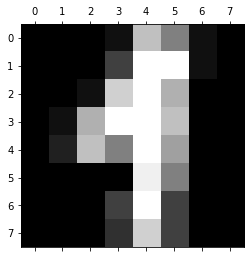

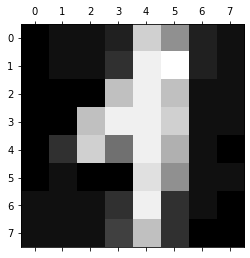

In [ ]:
plt.matshow(X_train[0].reshape(8, 8))
plt.matshow(X_train_fgsm[1437].reshape(8, 8))
plt.show()

### plot the accuracies

In [ ]:
origAcc = []
gaussianAcc = []
jsAcc = []
fgAcc = []
for eps in range(1, 10):
    X_test_adv_i = fgAttack(X_test, eps)
    
    predictions = model.predict(X_test_adv_i)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    origAcc.append(accuracy)
    print("Accuracy on adversarial examples: {:.2f}%".format(accuracy * 100))
    
    predictions = gaussianModel.predict(X_test_adv_i)
    accuracy2 = np.sum(predictions == y_test) / len(y_test)
    gaussianAcc.append(accuracy2)
    
    predictions = modelJs.predict(X_test_adv_i)
    accuracy3 = np.sum(predictions == y_test) / len(y_test)
    jsAcc.append(accuracy3)

    predictions = modelFg.predict(X_test_adv_i)
    accuracy4 = np.sum(predictions == y_test) / len(y_test)
    fgAcc.append(accuracy4)

    print(accuracy2, accuracy3, accuracy4)

Text(0, 0.5, 'Accuracy')

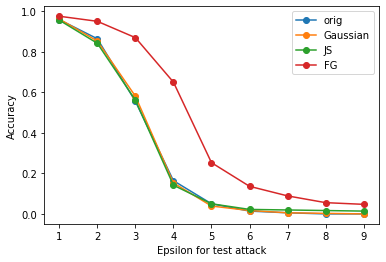

In [ ]:
import matplotlib.pyplot as plt

x = range(1, 10)
plt.plot(x, origAcc, '-o', label='orig')
plt.plot(x, gaussianAcc, '-o', label='Gaussian')
plt.plot(x, jsAcc, '-o', label='JS')
plt.plot(x, fgAcc, '-o', label='FG')
plt.legend()
plt.xlabel('Epsilon for test attack')
plt.ylabel('Accuracy')

In [ ]:
origAcc2 = []
gaussianAcc2 = []
jsAcc2 = []
fgAcc2 = []
for eps in range(1, 10):
    X_train_adv_i = fgAttack(X_train, eps)
    
    model2 = SVC(C=1.0, kernel="rbf").fit(X_train_adv_i, y_train)
    predictions = model2.predict(X_test)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    origAcc2.append(accuracy)
    
    X_train_gaus, y_train_gaus = getGaussianTrain(X_train_adv_i)
    gaussianModel2 = SVC(C=1.0, kernel="rbf").fit(X_train_gaus, y_train_gaus)
    predictions = gaussianModel2.predict(X_test)
    accuracy2 = np.sum(predictions == y_test) / len(y_test)
    gaussianAcc2.append(accuracy2)

    X_train_jsma = np.concatenate((X_train_adv_i, np.load(dir + 'X_train_jsma.npy')), axis=0)
    y_train_jsma = np.concatenate((y_train, np.load(dir + 'y_train_jsma.npy')))
    modelJs2 = SVC(C=1.0, kernel="rbf").fit(X_train_jsma, y_train_jsma)
    predictions = modelJs2.predict(X_test)
    accuracy3 = np.sum(predictions == y_test) / len(y_test)
    jsAcc2.append(accuracy3)
    
    X_train_fgsm2 = np.concatenate((X_train_adv_i, X_train_fgsm), axis=0)
    y_train_fgsm2 = np.concatenate((y_train, y_train))
    modelFg2 = SVC(C=1.0, kernel="rbf").fit(X_train_fgsm2, y_train_fgsm2)
    predictions = modelFg2.predict(X_test)
    accuracy4 = np.sum(predictions == y_test) / len(y_test)
    fgAcc2.append(accuracy4)
    
    print("Accuracy", accuracy, accuracy2, accuracy3, accuracy4)

Accuracy 0.9805555555555555 0.975 0.9777777777777777 0.9805555555555555
Accuracy 0.9555555555555556 0.9583333333333334 0.9611111111111111 0.9611111111111111
Accuracy 0.6611111111111111 0.775 0.7888888888888889 0.6305555555555555
Accuracy 0.16111111111111112 0.20277777777777778 0.49166666666666664 0.48055555555555557
Accuracy 0.08333333333333333 0.05555555555555555 0.26944444444444443 0.45555555555555555
Accuracy 0.03888888888888889 0.016666666666666666 0.18888888888888888 0.4388888888888889
Accuracy 0.044444444444444446 0.016666666666666666 0.20555555555555555 0.42777777777777776
Accuracy 0.05 0.019444444444444445 0.24166666666666667 0.475
Accuracy 0.05 0.022222222222222223 0.3111111111111111 0.5611111111111111


Text(0, 0.5, 'Accuracy')

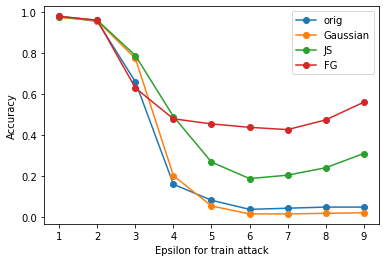

In [ ]:
import matplotlib.pyplot as plt

x = range(1, 10)
plt.plot(x, origAcc2, '-o', label='orig')
plt.plot(x, gaussianAcc2, '-o', label='Gaussian')
plt.plot(x, jsAcc2, '-o', label='JS')
plt.plot(x, fgAcc2, '-o', label='FG')
plt.legend()
plt.xlabel('Epsilon for train attack')
plt.ylabel('Accuracy')

## Training SVM on attacked data set.

Method: Iteratively train SVM on the data set. Each time, based on current 
hypothesis, we mark a certain percent of data and train SVM on the rest of data. Our performance should be comparable to the baseline.

In [ ]:
def trainSVMiter(X_train,y_train,X_test,y_test,R=10,prop=5):
  X_train_guess=X_train
  y_train_guess=y_train
  for _ in range(R):
  # rank the mis-classified samples and remove some of them. 
    model=SVC(C=1.0, kernel="poly", degree=2).fit(X_train_guess,y_train_guess)
    raws=[]
    predictions = model.predict(X_train)
    for i in range(len(y_train)):
      if predictions[i]!=y_train[i]:
        if random.randint(1, 10)>=prop:
          raws.append(i)
    X_train_guess=X_train
    y_train_guess=y_train
    X_train_guess=np.delete(X_train_guess,raws,axis=0)
    y_train_guess=np.delete(y_train_guess,raws,axis=0)
  print(X_train_guess.shape)
  predictions = model.predict(X_test)
  accuracy = np.sum(predictions == y_test) / len(y_test)
  print("Accuracy on test examples: {}%".format(accuracy * 100))

In [ ]:
import random
import numpy as np

In [ ]:
print(X_train.shape)

(1437, 64)


In [ ]:
X_train_adv = attack.generate(x=X_train)
trainSVMiter(X_train_adv, y_train, X_test, y_test, 100, 0)

In [ ]:
model=SVC(C=1.0, kernel="poly", degree=5).fit(X_train_adv, y_train)
predictions = model.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy on test examples: {}%".format(accuracy * 100))

Accuracy on test examples: 80.27777777777779%


In [ ]:
def trainSVMiterGary(X_train,y_train,X_test,y_test,R=10,prop=5):
  X_train_guess=X_train
  y_train_guess=y_train
  for _ in range(R):
  # rank the mis-classified samples and remove some of them. 
    model=SVC(C=1.0, kernel="poly", degree=2).fit(X_train_guess, y_train_guess)
    raws=[]
    predictions = model.predict(X_train)
    accuracy = np.sum(predictions == y_train) / len(y_train)
    print("Accuracy on train examples: {}%".format(accuracy * 100))
    for i in range(len(y_train)):
      if predictions[i]!=y_train[i]:
        if random.randint(1, 10)>=prop:
          raws.append(i)
      """
      else:
        if random.randint(1, 10)>=8:
          raws.append(i)
      """
    print(len(raws))
    X_train_guess=X_train
    y_train_guess=y_train
    X_train_guess=np.delete(X_train_guess,raws,axis=0)
    y_train_guess=np.delete(y_train_guess,raws,axis=0)
  print(X_train_guess.shape)
  predictions = model.predict(X_test)
  accuracy = np.sum(predictions == y_test) / len(y_test)
  print("Accuracy on test examples: {}%".format(accuracy * 100))

for i in range(2):
  trainSVMiterGary(X_train_adv, y_train, X_test, y_test, 20, 0)

Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
Accuracy on train examples: 99.65205288796103%
5
(1432, 64)
Accuracy 